<a href="https://colab.research.google.com/github/muriloufu/Hydrocyclone_ANN/blob/main/Yanne_Artigo_HGOT1_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
#selecao do dataset
path = 'https://github.com/muriloufu/Hydrocyclone_ANN/raw/main/Yanne_Artigo_HGOT1.xlsx'
df = pd.read_excel(path)
df

,Di (mm),Do (mm),h (mm),H (mm),Teta,l,Du,Etta,RL,Eu
0,3.990,6.000,46.5,159.0,9.0,10.0,3,68.20,14.12,6753.00
1,3.990,6.000,46.5,159.0,9.0,10.0,4,75.90,22.89,6444.00
2,3.990,6.000,46.5,159.0,9.0,10.0,5,80.37,38.60,6630.00
3,8.001,4.800,62.0,114.0,12.7,28.6,3,72.25,31.92,3029.00
4,8.001,4.800,62.0,114.0,12.7,28.6,4,81.57,49.77,2485.00
5,8.001,4.800,62.0,114.0,12.7,28.6,5,82.13,57.27,2119.00
6,8.400,10.200,79.0,71.0,20.0,12.0,3,46.76,0.64,1151.00
7,8.400,10.200,79.0,71.0,20.0,12.0,4,52.73,4.74,1237.00
8,8.400,10.200,79.0,71.0,20.0,12.0,5,55.88,11.79,1043.00
9,7.800,6.600,15.0,127.0,11.2,12.0,5,74.59,29.00,2416.00


In [ ]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        x[i]=2*((x[i]-min_x)/(max_x-min_x))-1
    return x

In [ ]:
# funcao retorna os dados a forma original - xi ISOLADO DA FUNCAO: NORMATIZA(X)
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        x[i]=((x[i]+1)/2)*(max_x-min_x)+min_x
    return x

In [ ]:
DAT_OLD=[] #Criar um dataframe em branco
DAT_OLD=df.copy() #No dataframe em branco esta colocando os dados de df (dataframe que chamou no inicio)
DAT=Normatiza(df) #No dataframe DAT coloca o dataframe df normatizado

In [ ]:
DAT #mostra o dataframe DAT que é o df normatizado

,Di (mm),Do (mm),h (mm),H (mm),Teta,l,Du,Etta,RL,Eu
0,-9.625000e-01,-0.578947,-0.503401,1.000000,-1.000000,-0.379310,-1.0,0.039011,-0.523927,1.000000
1,-9.625000e-01,-0.578947,-0.503401,1.000000,-1.000000,-0.379310,0.0,0.412164,-0.214197,0.895854
2,-9.625000e-01,-0.578947,-0.503401,1.000000,-1.000000,-0.379310,1.0,0.628786,0.340632,0.958544
3,7.087500e-01,-1.000000,-0.292517,-0.021566,-0.327273,0.903448,-1.0,0.235280,0.104715,-0.255140
4,7.087500e-01,-1.000000,-0.292517,-0.021566,-0.327273,0.903448,0.0,0.686940,0.735123,-0.438490
5,7.087500e-01,-1.000000,-0.292517,-0.021566,-0.327273,0.903448,1.0,0.714078,1.000000,-0.561847
6,8.750000e-01,0.894737,-0.061224,-0.997730,1.000000,-0.241379,-1.0,-1.000000,-1.000000,-0.888102
7,8.750000e-01,0.894737,-0.061224,-0.997730,1.000000,-0.241379,0.0,-0.710686,-0.855200,-0.859117
8,8.750000e-01,0.894737,-0.061224,-0.997730,1.000000,-0.241379,1.0,-0.558032,-0.606216,-0.924503
9,6.250000e-01,-0.368421,-0.931973,0.273553,-0.600000,-0.241379,1.0,0.348679,0.001589,-0.461746


In [ ]:
#dividindo randomicamente os dados de DAT em treino e teste
train=DAT.sample(frac=0.8,random_state=None)
test=DAT.drop(train.index)
#train=DAT.iloc[0:41,:]
#test=DAT.iloc[41:59:]

In [ ]:
#Definindo as variaveis independentes
x_train=train.iloc[:,[0,1,2,3,4,5,6]]
x_test=test.iloc[:,[0,1,2,3,4,5,6]]
X_OLD=DAT_OLD.iloc[:,[0,1,2,3,4,5,6]]

In [ ]:
#variaveis independentes de treino e teste
print(x_train)
print (x_test)

         Di (mm)   Do (mm)    h (mm)    H (mm)      Teta         l   Du
12  6.250000e-01 -0.368421 -0.047619  0.273553 -0.600000 -0.241379  0.0
23 -6.250000e-01  0.684211 -0.931973  0.273553 -0.600000 -0.241379  1.0
54  6.250000e-01  1.000000 -0.197279  1.000000 -1.000000 -0.241379  1.0
32  6.250000e-01  0.684211  0.632653 -0.793417  0.600000 -0.241379  1.0
41  2.220446e-16 -0.684211 -0.102041 -0.384790  0.000000 -0.241379  1.0
6   8.750000e-01  0.894737 -0.061224 -0.997730  1.000000 -0.241379 -1.0
43  2.220446e-16  1.000000 -0.102041 -0.384790  0.000000 -0.241379  1.0
15  6.250000e-01 -0.368421 -0.047619  0.273553 -0.600000  0.379310  1.0
18  6.250000e-01 -0.368421 -0.047619  0.273553 -0.600000  1.000000  1.0
2  -9.625000e-01 -0.578947 -0.503401  1.000000 -1.000000 -0.379310  1.0
33  2.220446e-16  0.157895 -0.877551 -0.384790  0.000000 -0.241379  1.0
7   8.750000e-01  0.894737 -0.061224 -0.997730  1.000000 -0.241379  0.0
46  6.250000e-01  1.000000 -0.197279  1.000000 -1.000000 -1.0000

In [ ]:
#definindo a variavel dependente Etta
y_train=train.iloc[:,[7]]
y_test=test.iloc[:,[7]]
Y_OLD=DAT_OLD.iloc[:,[7]]
print(y_train)
print(y_test)

        Etta
12  0.266295
23 -0.646232
54  0.651563
32 -0.530894
41  0.452387
6  -1.000000
43 -0.067604
15  0.370972
18  0.767870
2   0.628786
33 -0.571117
7  -0.710686
46  0.255634
51 -0.341410
8  -0.558032
1   0.412164
56 -0.406833
20 -0.273080
13 -0.387933
28 -0.193603
17  0.590986
37  1.000000
47  0.125757
31 -0.241095
45  0.182942
5   0.714078
30 -0.366610
50 -0.220741
39 -0.306033
14  0.105403
24 -0.973831
25 -0.284710
3   0.235280
4   0.686940
22 -0.250303
48  0.386964
57 -0.233826
0   0.039011
26 -0.634601
44 -0.026411
35 -0.191665
27  0.077780
34 -0.883208
9   0.348679
16  0.273564
29  0.069057
42 -0.246426
        Etta
10  0.238672
11 -0.126242
19 -0.107342
21  0.245941
36 -0.303126
38 -0.464987
40  0.083111
49  0.328810
52  0.168888
53  0.118488
55 -0.939908
58  0.060334


In [ ]:
#define a rede neural
#nessa rede vao ser usados 3 camadas: Input + hidden + output
#o numero de neuronios da output eh 1, porque tem 1 resposta (FIE)
#o numero de neuronios na hidden eh arbitrario. O artigo fez 12 neuronios nessa camada
#funcao de ativicao eh a logistic, segundo o artigo
#model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-10,hidden_layer_sizes=(100),
#                    random_state=1, max_iter=1000)
model = MLPRegressor(max_iter=1000000,random_state=1,solver='lbfgs',activation='tanh', learning_rate = 'adaptive', alpha=1e-10, hidden_layer_sizes= tuple(12 for _ in range(3)))
model.fit(x_train, y_train) 
#o solver eh o lbfgs usado para metodos quasi-newton
#coloquei 1000 itercoes

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-10, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(12, 12, 12), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
#treina a rede neural
#model.fit(x_train, y_train)
predict=model.predict([[6.250000e-01,  0.684211,  1.000000, -0.997730,   1.0, -0.241379,  0.0]])
predict

array([-0.27853567])

In [ ]:
#usa a rede neural para encontrar a resposta calculada do treino e do teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)


In [ ]:
#transforma as saidas da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [ ]:
#Desnormatizar os dados obtidos da rede neural
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [ ]:
#recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [ ]:
#Resposta para fazer o grafico (Etta-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Etta'].copy()
resist_obs_train=train['Etta'].copy()

In [ ]:
#Resposta para fazer o grafico (Etta-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Etta'].copy()
resist_obs_test=test['Etta'].copy()

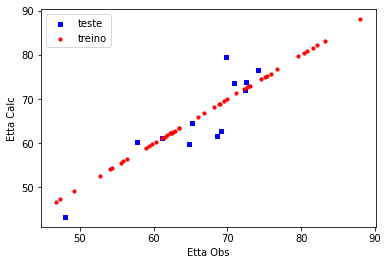

In [ ]:
#expressa os dois dados em figura - Etta
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Etta Calc')
plt.xlabel('Etta Obs')
plt.show()

In [ ]:
#checar a qualidade da regressao PARA TESTE
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 20.886241989255694
R^2 teste= 0.5960454924853233


In [ ]:
#checar a qualidade da regressao PARA TREINO
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.005031008254841898
R^2 treino= 0.9999492391298569
